In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def solve(M_1):
    # sin perdida de generalidad suponemos, p y rho
    p_1 = 1.0
    rho_1 = 1.0
    
    # p y rho determinan T por la ecuacion de estado.
    R = 8.314472 #m2 kg s-2 K-1 mol-1
    M = 28E-3 # kg/mol, suponiendo N_2, aunque no va a ser importante
    T_1 = (p_1/rho_1)*(M/R)
    
    #T_1 determina la velocidad del sonido
    gamma = 1.4 # gas diatomico
    c_1 = np.sqrt(gamma*(R/M)*T_1)
    
    #con M_1 se define la velocidad del gas
    u_1 = M_1 * c_1
    
    # usando la ecuacion encontrada en clase:
    c_p = (7.0/2.0) * (R/M) # para un gas ideal diatomico
    A = p_1/rho_1
    B = p_1/(T_1 * rho_1 * 2 * c_p)
    
    u_2 = (A + B*u_1**2)/(u_1*(1.0-B))
    #print(u_1, u_2)
    
    # a partir de la ecuacion de continuidad
    rho_2 = rho_1*u_1/u_2
    
    # a partir de la conservacion de momentum
    p_2 = p_1 + rho_1*u_1**2 - rho_2*u_2**2
    
    # a partir de la conservacion de la energia
    T_2 = (0.5*u_1**2 + c_p*T_1 - 0.5*u_2**2)/c_p
    
    # por la definicion de velocidad del sonido
    c_2 = np.sqrt(gamma*(R/M)*T_2)
    M_2 = u_2/c_2
    
    #check
    np.testing.assert_allclose(rho_2*u_2, rho_1 * u_1)
    np.testing.assert_allclose(0.5*u_2**2 + c_p*T_2, c_p*T_1 + 0.5*u_1**2)
    np.testing.assert_allclose(p_2 + rho_2*u_2**2, p_1 + rho_1*u_1**2)
    np.testing.assert_allclose(p_2/(rho_2 * T_2), p_1/(rho_1 * T_1))
    
    return M_2, p_2/p_1, rho_2/rho_1, T_2/T_1

In [31]:
M_1 = np.linspace(1,10,200)
M_2, p_ratio, rho_ratio, T_ratio = solve(M_1)

Text(0, 0.5, 'M2')

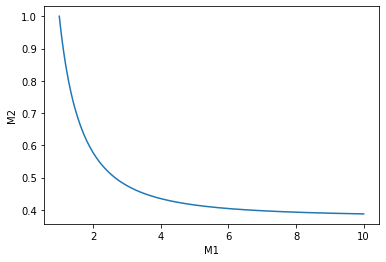

In [32]:
plt.plot(M_1, M_2)
plt.xlabel("M1")
plt.ylabel("M2")

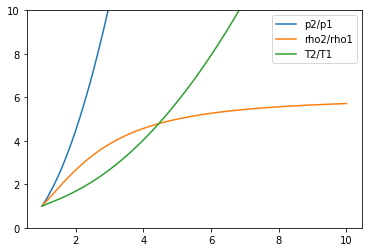

In [33]:
plt.plot(M_1, p_ratio, label="p2/p1")
plt.plot(M_1, rho_ratio, label="rho2/rho1")
plt.plot(M_1, T_ratio, label="T2/T1")
plt.ylim([0,10])
plt.legend()